In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
from matplotlib import pyplot as plt
from world import World
from agents import RandomAgent, ThompsonAgent, GradientAgent
import numpy as np
from tqdm.notebook import tqdm

In [6]:
k = 10
world = World(k)

In [49]:
agents = (RandomAgent(k), ThompsonAgent(k), GradientAgent(k, 0.1), GradientAgent(k, 0.3))
labels = ("random", "thompson", "gradient alpha=0.1", "gradient alpha=0.3")
rewards = [[] for _ in range(len(agents))]

steps = 1_000
for step in tqdm(range(steps)):
    for agent, reward_history in zip(agents,rewards):
        action = agent.act()
        _, reward, _, _ = world.step(action)
        reward_history.append(reward)
        agent.update(action, reward)

avg_rewards = [np.cumsum(reward_history) / np.arange(1, steps + 1) for reward_history in rewards]

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1094: RuntimeWarning: invalid value encountered in add
  vals = vals * scale + loc


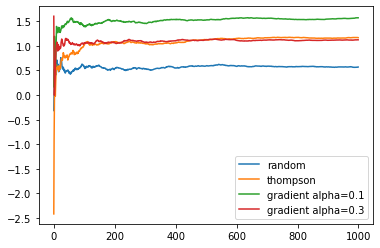

In [53]:
for avg_reward,label in zip(avg_rewards,labels):
    plt.plot(avg_reward, label=label)
_ = plt.legend()

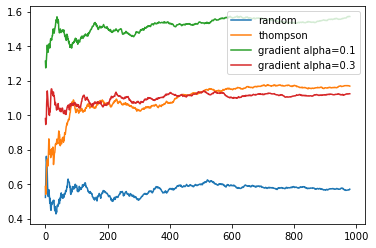

In [52]:
for avg_reward,label in zip(avg_rewards,labels):
    plt.plot(avg_reward[20:], label=label)
_ = plt.legend()